In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('./data/AL.csv')
df

,index,Key,Name,DateTime,Record,Status,Lat,Lon,Wind,Pressure,...,SW34,NW34,NE50,SE50,SW50,NW50,NE64,SE64,SW64,NW64
0,0,AL011851,UNNAMED,1851-06-25T00:00:00Z,NaN,HU,28.0,-94.8,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AL011851,UNNAMED,1851-06-25T06:00:00Z,NaN,HU,28.0,-95.4,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,AL011851,UNNAMED,1851-06-25T12:00:00Z,NaN,HU,28.0,-96.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,AL011851,UNNAMED,1851-06-25T18:00:00Z,NaN,HU,28.1,-96.5,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,AL011851,UNNAMED,1851-06-25T21:00:00Z,L,HU,28.2,-96.8,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49686,49686,AL162016,OTTO,2016-11-25T12:00:00Z,NaN,TS,10.3,-87.5,55.0,995.0,...,30.0,40.0,10.0,10.0,0.0,10.0,0.0,0.0,0.0,0.0
49687,49687,AL162016,OTTO,2016-11-25T18:00:00Z,NaN,TS,10.0,-88.8,50.0,997.0,...,30.0,40.0,10.0,10.0,0.0,10.0,0.0,0.0,0.0,0.0
49688,49688,AL162016,OTTO,2016-11-26T00:00:00Z,NaN,TS,9.7,-90.2,45.0,1000.0,...,30.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49689,49689,AL162016,OTTO,2016-11-26T06:00:00Z,NaN,TS,9.4,-91.7,40.0,1003.0,...,30.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Plot number of cases by year
df['year'] = pd.to_datetime(df['DateTime']).dt.year
count = df.groupby('year').size().reset_index(name='count')

# Trend line
trend = np.polyfit(count['year'], count['count'], 1)

fig = px.line(count, x='year', y='count', title='Number of cases by year')
fig.add_trace(go.Scatter(x=count['year'], y=trend[0]*count['year']+trend[1], mode='lines', name='Trend of cases'))
fig.update_layout(legend=dict(x=0.45, y=-0.3, orientation='h'))
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Number of cases')
fig.show()

In [4]:
# Plot the augmentation of cases since the beginning
count['cumsum'] = count['count'].cumsum()
fig = px.line(count, x='year', y='cumsum', title='Cumulative number of cases by year')
trend_cumsum = np.polyfit(count['year'], count['cumsum'], 1)
fig.add_trace(go.Scatter(x=count['year'], y=trend_cumsum[0]*count['year']+trend_cumsum[1], mode='lines', name='Trend of the cumulative sum'))
fig.update_layout(legend=dict(x=0.4, y=-0.3, orientation='h'))
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Cumulative number of cases')
fig.show()

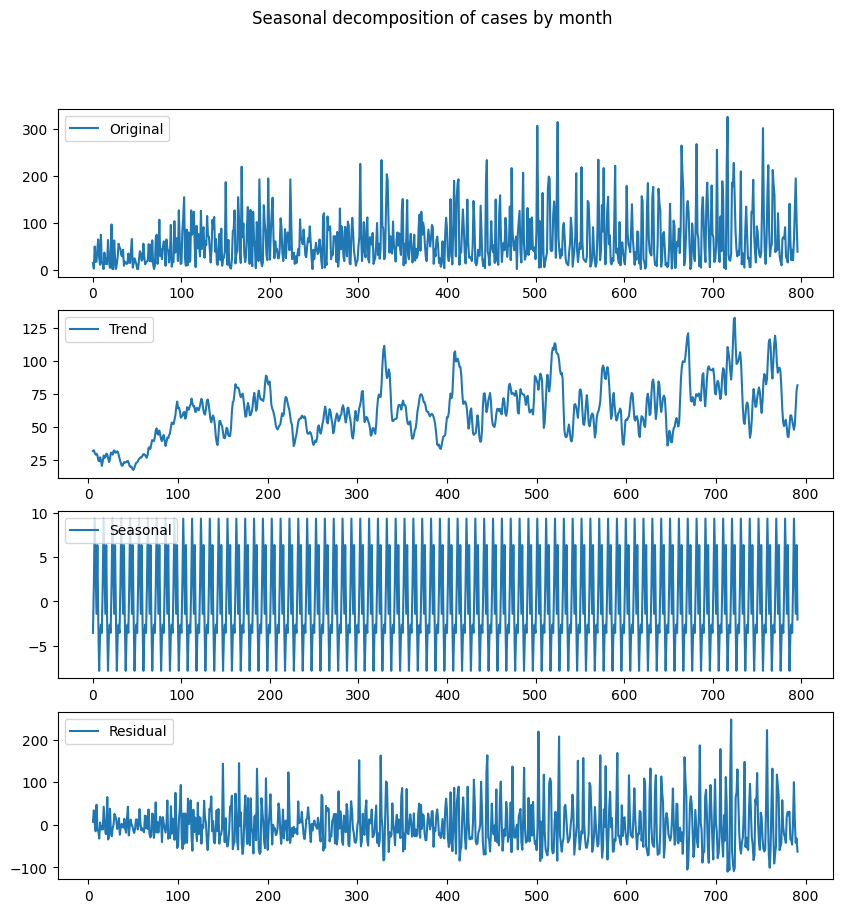

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

df['month'] = pd.to_datetime(df['DateTime']).dt.month
count = df.groupby(['year', 'month']).size().reset_index(name='count')


# Seasonal decomposition
decompose_result = seasonal_decompose(count['count'], model='additive', period=10)

# Subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 10))
fig.suptitle('Seasonal decomposition of cases by month')
axs[0].plot(count['count'], label='Original')
axs[0].legend(loc='upper left')
axs[1].plot(decompose_result.trend, label='Trend')
axs[1].legend(loc='upper left')
axs[2].plot(decompose_result.seasonal, label='Seasonal')
axs[2].legend(loc='upper left')
axs[3].plot(decompose_result.resid, label='Residual')
axs[3].legend(loc='upper left')
plt.show()

In [6]:
# Plot the wind speed by year
df['Wind']

df_grouped_by_year_wind = df.groupby('year')['Wind'].median().reset_index(name='median_wind')
fig = px.line(df_grouped_by_year_wind, x='year', y='median_wind', title='Median wind speed by year')
trend_median_wind = np.polyfit(df_grouped_by_year_wind['year'], df_grouped_by_year_wind['median_wind'], 1)
fig.add_trace(go.Scatter(x=df_grouped_by_year_wind['year'], y=trend_median_wind[0]*df_grouped_by_year_wind['year']+trend_median_wind[1], mode='lines', name='Trend of the median wind speed'))
fig.update_layout(legend=dict(x=0.4, y=-0.3, orientation='h'))
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Median wind speed (mph)')
fig.show()

# Plot to add to the Dash

In [15]:
df_AL = pd.read_csv('./data/AL.csv')
df_AL['DateTime'] = pd.to_datetime(df_AL['DateTime'])
df_AL = df_AL[df_AL['DateTime'].dt.year >= 1950]
df_AL = df_AL.reset_index(drop=True)
df_EP = pd.read_csv('./data/EP.csv')
df_EP['DateTime'] = pd.to_datetime(df_EP['DateTime'])
df_EP = df_EP[df_EP['DateTime'].dt.year >= 1950]
df_EP = df_EP.reset_index(drop=True)

In [16]:
# Concat the two dataframes
df = pd.concat([df_AL, df_EP])
df = df.reset_index(drop=True)
df = df.drop(columns=['index'])
# Drop value before 1950
df = df[df['DateTime'].dt.year >= 1950]
df.sort_values(by='DateTime', inplace=True)

In [17]:
df

,Key,Name,DateTime,Record,Status,Lat,Lon,Wind,Pressure,NE34,...,SW34,NW34,NE50,SE50,SW50,NW50,NE64,SE64,SW64,NW64
27812,EP011950,UNNAMED,1950-06-14 12:00:00+00:00,NaN,HU,14.1,-98.2,75.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27813,EP011950,UNNAMED,1950-06-14 18:00:00+00:00,NaN,HU,14.2,-98.5,75.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27814,EP011950,UNNAMED,1950-06-15 00:00:00+00:00,NaN,HU,14.4,-98.9,75.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27815,EP011950,UNNAMED,1950-06-15 06:00:00+00:00,NaN,HU,14.8,-99.5,75.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27816,EP011950,UNNAMED,1950-06-15 12:00:00+00:00,NaN,HU,15.2,-99.9,75.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27809,AL162016,OTTO,2016-11-26 00:00:00+00:00,NaN,TS,9.7,-90.2,45.0,1000.0,40.0,...,30.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27810,AL162016,OTTO,2016-11-26 06:00:00+00:00,NaN,TS,9.4,-91.7,40.0,1003.0,40.0,...,30.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54596,EP222016,OTTO,2016-11-26 06:00:00+00:00,NaN,TS,9.4,-91.7,40.0,1003.0,40.0,...,30.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27811,AL162016,OTTO,2016-11-26 12:00:00+00:00,NaN,TD,9.1,-93.3,30.0,1005.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Plot number of cases by year
df['year'] = pd.to_datetime(df['DateTime']).dt.year
count = df.groupby('year').size().reset_index(name='count')


fig = go.Figure()
fig.add_trace(go.Bar(x=count['year'], y=count['count'], name='Number of cases by year'))
fig.update_layout(title='Number of cases by year on Atlantic (AL) and Eastern Pacific (EP)', xaxis_title='Year', yaxis_title='Number of cases')
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Number of cases')

# Add rolling mean
count['rolling_mean'] = count['count'].rolling(window=10).mean()
fig.add_trace(go.Scatter(x=count['year'], y=count['rolling_mean'], mode='lines', name='Rolling mean of cases (10 years window)'))
# Add rolling mean to the legend
fig.update_layout(legend=dict(x=0.35, y=-0.75, orientation='h'))

# Time series range slider
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [30]:
from plotly.subplots import make_subplots

# Plot the augmentation for AL and EP
df_AL['year'] = pd.to_datetime(df_AL['DateTime']).dt.year
df_EP['year'] = pd.to_datetime(df_EP['DateTime']).dt.year

count_AL = df_AL.groupby('year').size().reset_index(name='count')
count_EP = df_EP.groupby('year').size().reset_index(name='count')
    
# Clear the figure
fig = go.Figure()

# Subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Number of cases by year in AL', 'Number of cases by year in EP'))

fig.add_trace(go.Bar(x=count_AL['year'], y=count_AL['count'], name='Number of cases by year in AL'), row=1, col=1)
# Add rolling mean
count_AL['rolling_mean'] = count_AL['count'].rolling(window=10).mean()
fig.add_trace(go.Scatter(x=count_AL['year'], y=count_AL['rolling_mean'], mode='lines', name='Trend of cases in AL'), row=1, col=1)

fig.add_trace(go.Bar(x=count_EP['year'], y=count_EP['count'], name='Number of cases by year in EP'), row=1, col=2)
# Add rolling mean
count_EP['rolling_mean'] = count_EP['count'].rolling(window=10).mean()
fig.add_trace(go.Scatter(x=count_EP['year'], y=count_EP['rolling_mean'], mode='lines', name='Trend of cases in EP'), row=1, col=2)

fig.update_layout(title_text='Number of cases by year in AL and EP')
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Number of cases')
fig.update_layout(legend=dict(x=0.15, y=-0.3, orientation='h'))
fig.show()

In [34]:
# Plot the rolling mean
fig = go.Figure()
fig.add_trace(go.Scatter(x=count['year'], y=count['rolling_mean'], mode='lines', name='Trend of cases'))
fig.add_trace(go.Scatter(x=count_AL['year'], y=count_AL['rolling_mean'], mode='lines', name='Trend of cases in AL'))
fig.add_trace(go.Scatter(x=count_EP['year'], y=count_EP['rolling_mean'], mode='lines', name='Trend of cases in EP'))
fig.update_layout(title='Trends of cases by year', xaxis_title='Year', yaxis_title='Number of cases')
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Number of cases')
fig.update_layout(legend=dict(x=0.35, y=-0.3, orientation='h'))
fig.show()

In [39]:
fig = go.Figure()
# Maximum wind speed by year
df_grouped_by_year_wind = df.groupby('year')['Wind'].max().reset_index(name='max_wind')
fig.add_trace(go.Scatter(x=df_grouped_by_year_wind['year'], y=df_grouped_by_year_wind['max_wind'], mode='lines', name='Max wind speed by year', line=dict(color='blue')))

# Minimum wind speed by year
df_grouped_by_year_wind_min = df.groupby('year')['Wind'].min().reset_index(name='min_wind')
fig.add_trace(go.Scatter(x=df_grouped_by_year_wind_min['year'], y=df_grouped_by_year_wind_min['min_wind'], mode='lines', name='Min wind speed by year', line=dict(color='green')))

# Rolling mean max
df_grouped_by_year_wind['rolling_mean'] = df_grouped_by_year_wind['max_wind'].rolling(window=10).mean()
fig.add_trace(go.Scatter(x=df_grouped_by_year_wind['year'], y=df_grouped_by_year_wind['rolling_mean'], mode='lines', name='Trend of max wind speed', line=dict(color='red')))

# Rolling mean min
df_grouped_by_year_wind_min['rolling_mean_min'] = df_grouped_by_year_wind_min['min_wind'].rolling(window=10).mean()
fig.add_trace(go.Scatter(x=df_grouped_by_year_wind_min['year'], y=df_grouped_by_year_wind_min['rolling_mean_min'], mode='lines', name='Trend of min wind speed', line=dict(color='orange')))


fig.update_layout(legend=dict(x=0.2, y=-0.75, orientation='h'))
fig.update_layout(title='Wind speed by year')
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Wind speed (mph)')

fig.update_xaxes(rangeslider_visible=True)
fig.show()